In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

from sklearn.metrics import confusion_matrix

from keras.preprocessing.image import ImageDataGenerator, array_to_img
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

from datetime import datetime

start_time = datetime.now()

Using TensorFlow backend.


In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')
root_path = 'gdrive/My Drive/xray_files/'  #change dir to your project folder

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
hyper_dimension = 100
hyper_epochs = 20
hyper_batch_size = 16
hyper_feature_maps = 32
hyper_channels = 1
hyper_mode = 'grayscale'

In [ ]:
# Initializing the CNN
classifier = Sequential()

# Convolution & pooling - First convolution layer
classifier.add(Conv2D(hyper_feature_maps, (3, 3),
                      input_shape = (hyper_dimension,
                                     hyper_dimension,
                                     hyper_channels),
                      activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Convolution & pooling - Second convolution layer (same as first layer)
classifier.add(Conv2D(hyper_feature_maps, (3, 3),
                      input_shape = (hyper_dimension,
                                     hyper_dimension,
                                     hyper_channels),
                      activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Convolution & pooling - Third convolution layer
classifier.add(Conv2D(hyper_feature_maps * 2, (3, 3),
                      input_shape = (hyper_dimension,
                                     hyper_dimension,
                                     hyper_channels),
                      activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Flattening
classifier.add(Flatten())
# Full connection
classifier.add(Dense(units = hyper_feature_maps * 2, activation = 'relu'))
classifier.add(Dense(units = 1, activation = 'sigmoid'))

# Compiling the CNN
classifier.compile(optimizer = 'adam',
                   loss = 'binary_crossentropy',
                   metrics = ['accuracy'])

In [ ]:
# Creating training and validation image flows

train_gen = ImageDataGenerator(rescale = 1./255,
                               shear_range = 0.2,
                               zoom_range = 0.2,
                               vertical_flip = True)

val_gen = ImageDataGenerator(rescale = 1./255)

train_set = train_gen.flow_from_directory(f'{root_path}train',
                                          target_size = (hyper_dimension,
                                                         hyper_dimension),
                                          batch_size = hyper_batch_size,
                                          class_mode = 'binary',
                                          color_mode = hyper_mode)

val_set = val_gen.flow_from_directory(f'{root_path}val',
                                      target_size = (hyper_dimension,
                                                     hyper_dimension),
                                      batch_size = hyper_batch_size,
                                      class_mode = 'binary',
                                      color_mode = hyper_mode)

Found 4192 images belonging to 2 classes.
Found 1040 images belonging to 2 classes.


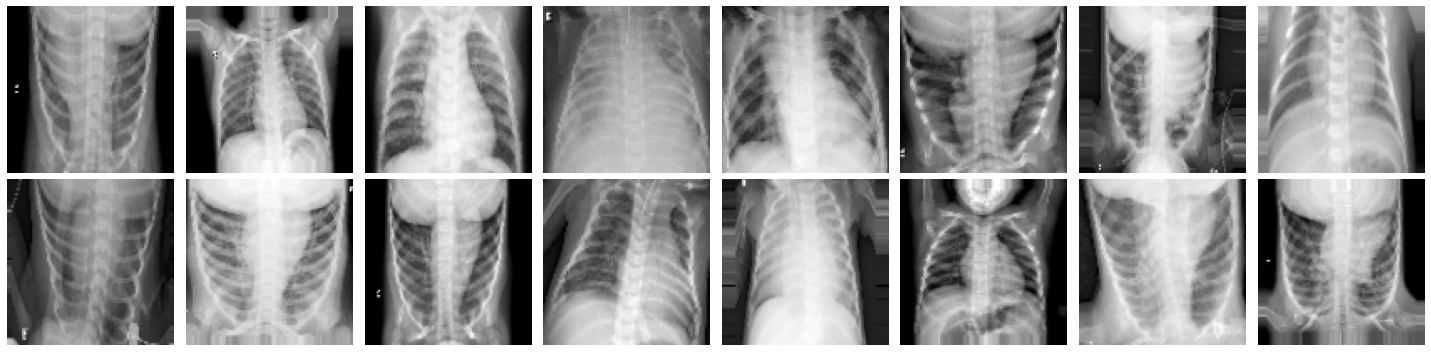

In [ ]:
# Visualizing images in the first training set batch 

image_batch = train_set[0][0]

plt.figure(figsize=(20,5))
for i in range(len(image_batch)):
    plt.subplot(2,8,i+1)
    pil_img = array_to_img(image_batch[i])
    plt.imshow(pil_img,cmap='gray')
    plt.axis('off')
plt.tight_layout()
plt.show()

In [ ]:
# Fitting the model

results = classifier.fit_generator(train_set,
                                   steps_per_epoch = len(train_set),
                                   epochs = hyper_epochs,
                                   validation_data = val_set,
                                   validation_steps = len(val_set))

Epoch 1/20
262/262 [==============================] - 1164s 4s/step - loss: 0.4072 - accuracy: 0.8161 - val_loss: 0.3176 - val_accuracy: 0.8875
Epoch 2/20
262/262 [==============================] - 60s 229ms/step - loss: 0.2684 - accuracy: 0.8841 - val_loss: 0.2840 - val_accuracy: 0.8067
Epoch 3/20
262/262 [==============================] - 59s 226ms/step - loss: 0.2349 - accuracy: 0.9031 - val_loss: 0.1847 - val_accuracy: 0.9298
Epoch 4/20
262/262 [==============================] - 59s 226ms/step - loss: 0.2095 - accuracy: 0.9160 - val_loss: 0.0906 - val_accuracy: 0.9231
Epoch 5/20
262/262 [==============================] - 59s 227ms/step - loss: 0.2036 - accuracy: 0.9179 - val_loss: 0.0814 - val_accuracy: 0.9317
Epoch 6/20
262/262 [==============================] - 60s 227ms/step - loss: 0.1832 - accuracy: 0.9260 - val_loss: 0.1228 - val_accuracy: 0.9183
Epoch 7/20
262/262 [==============================] - 61s 232ms/step - loss: 0.1650 - accuracy: 0.9337 - val_loss: 0.2590 - val_acc

In [ ]:
# Creating test image flow

test_gen = ImageDataGenerator(rescale = 1./255)

test_set = test_gen.flow_from_directory(f'{root_path}/test',
                                        target_size = (hyper_dimension,
                                                       hyper_dimension),
                                        batch_size = 1,
                                        class_mode = None,
                                        color_mode = hyper_mode,
                                        shuffle=False)

# Making predictions

predictions = classifier.predict_generator(test_set)
predictions[predictions <= 0.5] = 0
predictions[predictions > 0.5] = 1

Found 624 images belonging to 2 classes.


In [ ]:
# Confusion matrix

cm = pd.DataFrame(data=confusion_matrix(test_set.classes, predictions, labels=[0, 1]),
                  index=["Actual Normal", "Actual Pneumonia"],
                  columns=["Predicted Normal", "Predicted Pneumonia"])
cm

,Predicted Normal,Predicted Pneumonia
Actual Normal,157,77
Actual Pneumonia,0,390


In [ ]:
end_time = datetime.now()

print('\nStart time', start_time)
print('End time', end_time)
print('Time elapsed', end_time - start_time)


Start time 2020-07-18 22:31:36.195696
End time 2020-07-18 23:13:25.270410
Time elapsed 0:41:49.074714


In [ ]:
classifier.save(f'{root_path}model.h5') 